In [5]:
import pandas as pd
import numpy as np


# csv 파일이되 데이터 구분을 '|' 로 해둔 파일입니다. sep 지정을 안 하면 읽을 수 없습니다.
df = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202303.csv') 
df.head()

C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_10964\3840163286.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/소상공인시장진흥공단_상가(상권)정보_서울_202303.csv')


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0037544,영자's곱창,NaN,I2,음식,I201,한식,I20109,곱창 전골/구이,I56111,...,1121510100101690021003140,NaN,서울특별시 광진구 면목로 172,143900,4904,NaN,1,NaN,127.082832,37.568503
1,MA0101202210A0097916,호텔클로이,NaN,I1,숙박,I101,일반 숙박,I10102,여관/모텔,I55102,...,1114014500101300000014092,유성장,서울특별시 중구 을지로42길 11,100411,4561,NaN,NaN,NaN,127.005849,37.565708
2,MA0101202210A0096343,나라차중계태권도장,NaN,P1,교육,P106,기타 교육,P10601,태권도/무술학원,P85611,...,1135010600103640019010971,삼부프라자,서울특별시 노원구 한글비석로 242,139861,1734,NaN,NaN,NaN,127.076956,37.649226
3,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
4,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053


In [79]:
# 음식점 데이터만 쓸 겁니다
df = df.loc[df['상권업종대분류명'] == '음식']  

# 다음과 같은 칼럼만 있으면 됩니다
df = df[['상호명', '상권업종중분류명', '상권업종소분류명', '표준산업분류명', '행정동명', '위도', '경도']]

# 그 중에서도 흑석동과 상도1동만 쓸 겁니다.
df = df.loc[(df['행정동명'] == '흑석동') | (df['행정동명'] == '상도1동')]

In [80]:
df.columns = ['name',  # 상호명
              'cate_1',  # 중분류명
              'cate_2',  # 소분류명
              'cate_3',  # 표준산업분류명
              'dong',  # 행정동명
              'lon',  # 위도
              'lat'  # 경도
              ]

In [81]:
df['cate_mix'] = df['cate_1'] + df['cate_2'] +  df['cate_3']
df['cate_mix'] = df['cate_mix'].str.replace("/", " ")
df

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix
808,프랑세즈,비알코올,카페,커피 전문점,흑석동,37.507927,126.964257,비알코올 카페커피 전문점
1553,배달삼겹직구삼동작,한식,돼지고기 구이/찜,한식 육류 요리 전문점,상도1동,37.499926,126.951045,한식돼지고기 구이 찜한식 육류 요리 전문점
1745,학교종이땡땡땡,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507594,126.959160,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업
1822,부산어묵,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507188,126.963260,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업
2144,김빠빠누룽지통닭,주점,요리 주점,기타 주점업,상도1동,37.504582,126.950753,주점요리 주점기타 주점업
...,...,...,...,...,...,...,...,...
471383,샐러디,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,상도1동,37.505102,126.953528,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업
471897,와플러버,비알코올,카페,커피 전문점,상도1동,37.505131,126.953720,비알코올 카페커피 전문점
472823,그랩커피브런치,비알코올,카페,커피 전문점,흑석동,37.506633,126.959502,비알코올 카페커피 전문점
472830,역전할머니맥주상도역점,주점,생맥주 전문,한식 일반 음식점업,상도1동,37.501893,126.948337,주점생맥주 전문한식 일반 음식점업


In [3]:
from sklearn.feature_extraction.text import CountVectorizer  # 피체 벡터화
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
import matplotlib.pyplot as plt

In [8]:
dfX = pd.read_csv('./222ss.csv')
dfX.head()

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix,naver_keyword,naver_map_url,naver_store_type,naver_star_point,naver_star_point_qty,naver_blog_review_txt,naver_blog_review_qty
0,프랑세즈,비알코올,카페,커피 전문점,흑석동,37.507927,126.964257,비알코올 카페커피 전문점,흑석동%20프랑세즈,https://m.place.naver.com/restaurant/32799888,베이커리,4.60,1737,"[광고아님! 지극히 개인적 빵순이의 도움되실 관점] 맛 4/5, 청결 4/5, 가격...",243
1,배달삼겹직구삼동작,한식,돼지고기 구이/찜,한식 육류 요리 전문점,상도1동,37.499926,126.951045,한식돼지고기 구이 찜한식 육류 요리 전문점,상도1동%20배달삼겹직구삼동작,https://m.place.naver.com/restaurant/1124696525,돼지고기구이,4.41,149,"맛있어요 리뷰이벤트파채 새콤하니 좋았어요 담에시키면 삼겹살로만 시킬듯??,언제나 친...",27
2,학교종이땡땡땡,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507594,126.959160,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20학교종이땡땡땡,https://m.place.naver.com/restaurant/1565352333,종합분식,4.38,91,"쫄순 맛나용 중대 맛집????,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 ...",32
3,김빠빠누룽지통닭,주점,요리 주점,기타 주점업,상도1동,37.504582,126.950753,주점요리 주점기타 주점업,상도1동%20김빠빠누룽지통닭,https://m.place.naver.com/restaurant/1227120427,"치킨,닭강정",4.49,94,"통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡...",51
4,준호네즉석떡볶이,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,상도1동,37.496930,126.953529,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,상도1동%20준호네즉석떡볶이,https://m.place.naver.com/restaurant/37370414,떡볶이,4.41,117,즉떡에 진심인 울 가족~ 소스가 자극적이지 않고 자연스런 단맛 매운맛 나서 궁물도 ...,54


In [9]:
count_vect_category = CountVectorizer(min_df=0, ngram_range=(1,2))
place_category = count_vect_category.fit_transform(dfX['cate_mix']) 
place_simi_cate = cosine_similarity(place_category, place_category) 
place_simi_cate_sorted_ind = place_simi_cate.argsort()[:, ::-1]

In [169]:
len(df['cate_mix']), len(df['naver_blog_review_txt'])

(640, 640)

In [85]:
place_simi_cate_sorted_ind

array([[  0, 245, 640, ..., 448, 446, 382],
       [143, 419, 264, ..., 449, 448, 382],
       [314, 699, 445, ..., 255, 530,   0],
       ...,
       [  0, 245, 640, ..., 448, 446, 382],
       [194, 763, 757, ..., 450, 451,   0],
       [764, 348, 128, ..., 465, 464,   0]], dtype=int64)

In [2]:
#selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
# pip install tqdm
from tqdm.notebook import tqdm_notebook
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

chromedriver = '../chromedriver' # 셀레늄이 이용할 크롤링 드라이버 디렉토리를 입력
driver = webdriver.Chrome(chromedriver) 

In [87]:
# 네이버 지도 검색창에 [~동 @@식당]으로 검색해 정확도를 높여야 합니다. 검색어를 미리 설정해줍시다.

df['naver_keyword'] = df['dong'] + "%20" + df['name']  # "%20"는 띄어쓰기를 의미합니다.
df['naver_map_url'] = ''
# 본격적으로 가게 상세페이지의 URL을 가져옵시다

for i, keyword in enumerate(df['naver_keyword'].tolist()):
    print("이번에 찾을 키워드 :", i, f"/ {df.shape[0] -1} 행", keyword)
    try:
        naver_map_search_url = f"https://m.map.naver.com/search2/search.naver?query={keyword}&sm=hty&style=v5"
        
        driver.get(naver_map_search_url)
        time.sleep(3.5)
        df.iloc[i,-1] = driver.find_element_by_css_selector("#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview").get_attribute('data-cid')
        # 네이버 지도 시스템은 data-cid에 url 파라미터를 저장해두고 있었습니다.
        # data-cid 번호를 뽑아두었다가 기본 url 템플릿에 넣어 최종적인 url을 완성하면 됩니다.
        
        #만약 검색 결과가 없다면?
    except Exception as e1:
        if "li:nth-child(1)" in str(e1):  # -> "child(1)이 없던데요?"
            try:
                df.iloc[i,-1] = driver.find_element_by_css_selector("#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview").get_attribute('data-cid')
                time.sleep(1)
            except Exception as e2:
                print(e2)
                df.iloc[i,-1] = np.nan
                time.sleep(1)
        else:
            pass


driver.quit()


# 이때 수집한 것은 완전한 URL이 아니라 URL에 들어갈 ID (data-cid 라는 코드명으로 저장된) 이므로, 온전한 URL로 만들어줍니다

df['naver_map_url'] = "https://m.place.naver.com/restaurant/" + df['naver_map_url']


# URL이 수집되지 않은 데이터는 제거합니다.
df = df.loc[~df['naver_map_url'].isnull()]

이번에 찾을 키워드 : 0 / 764 행 흑석동%20프랑세즈
이번에 찾을 키워드 : 1 / 764 행 상도1동%20배달삼겹직구삼동작
이번에 찾을 키워드 : 2 / 764 행 흑석동%20학교종이땡땡땡
이번에 찾을 키워드 : 3 / 764 행 흑석동%20부산어묵
이번에 찾을 키워드 : 4 / 764 행 상도1동%20김빠빠누룽지통닭
이번에 찾을 키워드 : 5 / 764 행 상도1동%20행복푸드
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance._linkSiteview"}
  (Session info: chrome=114.0.5735.134)

이번에 찾을 키워드 : 6 / 764 행 상도1동%20준호네즉석떡볶이
이번에 찾을 키워드 : 7 / 764 행 상도1동%20카페,숨
이번에 찾을 키워드 : 8 / 764 행 흑석동%20황토방식당
이번에 찾을 키워드 : 9 / 764 행 흑석동%20주주총회
이번에 찾을 키워드 : 10 / 764 행 상도1동%20놀부자정육식당
이번에 찾을 키워드 : 11 / 764 행 흑석동%20대관령
이번에 찾을 키워드 : 12 / 764 행 상도1동%20이디야
이번에 찾을 키워드 : 13 / 764 행 상도1동%20설쌈냉면
이번에 찾을 키워드 : 14 / 764 행 상도1동%20라이프is원더플카페
Message: no such element: Unable to locate element: {"method":"css selector","selector":"#ct > div.search_listview._content._ctList > ul > li:nth-child(1) > div.item_info > a.a_item.a_item_distance

In [128]:
# 각 데이터들을 미리 리스트에 담은 다음, 마지막에 데이터 프레임에 합칠 것입니다.
from bs4 import BeautifulSoup
import requests
import re

naver_map_type_list = []
blog_review_list = []
blog_review_qty_list = []
naver_map_star_review_stars_list = []
naver_map_star_review_qty_list = []
chromedriver = '../chromedriver' 

# 메인 드라이버 : 별점 등을 크롤링
driver = webdriver.Chrome(chromedriver) 
# 서브 드라이버 : 블로그 리뷰 텍스트를 리뷰 탭 들어가서 크롤링

for i, url in enumerate(tqdm_notebook(df['naver_map_url'])):
    driver.get(url)
    re_wait = WebDriverWait(driver, 10)
    response = requests.get(url+"/review/visitor")
    if response.status_code == 200:
        response.encoding = 'utf-8'  # 인코딩 설정
        datas = response.text
    soup = BeautifulSoup(datas, 'html.parser')

    
    try:

        # 간단 정보 가져오기
        
        # 네이버 지도의 유형 분류
        naver_map_type = driver.find_element_by_css_selector("#_title > span.DJJvD").text

        # 블로그 리뷰 수
        blog_review_qty =  re_wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#app-root > div > div > div > div.place_section.OP4V8 > div.zD5Nm > div.dAsGb > span:nth-child(3) > a > em"))).text

        # 리뷰 별점 점수
        star_review_stars = re_wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#app-root > div > div > div > div.place_section.OP4V8 > div.zD5Nm > div.dAsGb > span.PXMot.LXIwF > em"))).text

        # 리뷰 별점 평가 수
        star_review_qty = re_wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#app-root > div > div > div > div.place_section.OP4V8 > div.zD5Nm > div.dAsGb > span:nth-child(2) > a > em"))).text


        # 블로그 리뷰 텍스트 가져오기
        review_text_list = [] # 임시 선언

        a = soup.select('.zPfVt')

        review_text_list.append(re.sub(r'\s+', ' ', a[0].text))
        review_text_list.append(re.sub(r'\s+', ' ', a[1].text))
        review_text_list.append(re.sub(r'\s+', ' ', a[2].text))
        
        # 네이버 지도 블로그 리뷰 탭은 동적 웹사이트의 순서가 주문하기, 메뉴보기 등의 존재 여부로 다르기 때문에 css selector가 아니라 element 찾기로 진행
        
        # find element's' 메소드를 통해 가져온 내용은 리스트로 저장되고, 리스트 타입을 풀어서(for문 사용) 임시 데이터에 모아 두어야 한다
        
        # 그 리스트에 저장된 텍스트 (한 식당에 대한 여러 리뷰들)를 한 텍스트 덩어리로 모아(join)줍니다.
        review_text = ','.join(review_text_list)


        blog_review_list.append(review_text)

        naver_map_type_list.append(naver_map_type)
        blog_review_qty_list.append(blog_review_qty)
        naver_map_star_review_stars_list.append(star_review_stars)
        naver_map_star_review_qty_list.append(star_review_qty)

    # 리뷰가 없는 업체는 크롤링에 오류가 뜨므로 표기해둡니다.
    except Exception as e1:
        print(f"{i}행 문제가 발생")
        
        # 리뷰가 없으므로 null을 임시로 넣어줍니다.
        naver_map_star_review_stars_list.append('null')
        blog_review_list.append(review_text)
        naver_map_type_list.append(naver_map_type)
        blog_review_qty_list.append(blog_review_qty)
        naver_map_star_review_qty_list.append(star_review_qty)

        
driver.quit()


df['naver_store_type'] = naver_map_type_list  # 네이버 상세페이지에서 크롤링한 업체 유형
df['naver_star_point'] = naver_map_star_review_stars_list  # 네이버 상세페이지에서 평가한 별점 평점
df['naver_star_point_qty'] = naver_map_star_review_qty_list  # 네이버 상세페이지에서 별점 평가를 한 횟수
df['naver_blog_review_txt'] = blog_review_list  # 네이버 상세페이지에 나온 블로그 리뷰 텍스트들
df['naver_blog_review_qty'] = blog_review_qty_list  # 네이버 상세페이지에 나온 블로그 리뷰의 총 개수

  0%|          | 0/640 [00:00<?, ?it/s]

3행 문제가 발생
7행 문제가 발생
10행 문제가 발생
11행 문제가 발생
13행 문제가 발생
14행 문제가 발생
16행 문제가 발생
21행 문제가 발생
25행 문제가 발생
28행 문제가 발생
31행 문제가 발생
32행 문제가 발생
35행 문제가 발생
37행 문제가 발생
38행 문제가 발생
40행 문제가 발생
41행 문제가 발생
47행 문제가 발생
49행 문제가 발생
58행 문제가 발생
59행 문제가 발생
61행 문제가 발생
66행 문제가 발생
67행 문제가 발생
69행 문제가 발생
72행 문제가 발생
74행 문제가 발생
75행 문제가 발생
78행 문제가 발생
80행 문제가 발생
84행 문제가 발생
86행 문제가 발생
88행 문제가 발생
90행 문제가 발생
92행 문제가 발생
95행 문제가 발생
100행 문제가 발생
101행 문제가 발생
104행 문제가 발생
110행 문제가 발생
112행 문제가 발생
114행 문제가 발생
115행 문제가 발생
120행 문제가 발생
121행 문제가 발생
123행 문제가 발생
125행 문제가 발생
128행 문제가 발생
130행 문제가 발생
131행 문제가 발생
133행 문제가 발생
134행 문제가 발생
135행 문제가 발생
139행 문제가 발생
145행 문제가 발생
148행 문제가 발생
149행 문제가 발생
150행 문제가 발생
160행 문제가 발생
161행 문제가 발생
162행 문제가 발생
166행 문제가 발생
170행 문제가 발생
175행 문제가 발생
181행 문제가 발생
184행 문제가 발생
189행 문제가 발생
192행 문제가 발생
193행 문제가 발생
195행 문제가 발생
198행 문제가 발생
202행 문제가 발생
203행 문제가 발생
205행 문제가 발생
206행 문제가 발생
212행 문제가 발생
219행 문제가 발생
222행 문제가 발생
224행 문제가 발생
227행 문제가 발생
233행 문제가 발생
234행 문제가 발생
236행 문제가 발생
240행 문제가 발생
243행 문제가 발생
245행 문제가 발생
252행 문

C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\4054950147.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['naver_store_type'] = naver_map_type_list  # 네이버 상세페이지에서 크롤링한 업체 유형
C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\4054950147.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['naver_star_point'] = naver_map_star_review_stars_list  # 네이버 상세페이지에서 평가한 별점 평점
C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\4054950147.py:85: SettingWithCopyWarning: 
A value is trying to be s

In [259]:
df.nunique()

name                     627
cate_1                     9
cate_2                    35
cate_3                    23
dong                       2
lon                      424
lat                      424
cate_mix                  64
naver_keyword            634
naver_map_url            619
naver_store_type         107
naver_star_point          89
naver_star_point_qty     300
naver_blog_review_txt    429
naver_blog_review_qty    129
dtype: int64

In [262]:
df.to_csv('111.csv', index=False)

In [129]:
df.head(14)

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix,naver_keyword,naver_map_url,naver_store_type,naver_star_point,naver_star_point_qty,naver_blog_review_txt,naver_blog_review_qty
808,프랑세즈,비알코올,카페,커피 전문점,흑석동,37.507927,126.964257,비알코올 카페커피 전문점,흑석동%20프랑세즈,https://m.place.naver.com/restaurant/32799888,베이커리,4.6,"1,737","[광고아님! 지극히 개인적 빵순이의 도움되실 관점] 맛 4/5, 청결 4/5, 가격...",243
1553,배달삼겹직구삼동작,한식,돼지고기 구이/찜,한식 육류 요리 전문점,상도1동,37.499926,126.951045,한식돼지고기 구이 찜한식 육류 요리 전문점,상도1동%20배달삼겹직구삼동작,https://m.place.naver.com/restaurant/1124696525,돼지고기구이,4.41,149,"맛있어요 리뷰이벤트파채 새콤하니 좋았어요 담에시키면 삼겹살로만 시킬듯🥰,언제나 친절...",27
1745,학교종이땡땡땡,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507594,126.959160,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20학교종이땡땡땡,https://m.place.naver.com/restaurant/1565352333,종합분식,4.38,91,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32
1822,부산어묵,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507188,126.963260,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20부산어묵,https://m.place.naver.com/restaurant/34013979,분식,null,91,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32
2144,김빠빠누룽지통닭,주점,요리 주점,기타 주점업,상도1동,37.504582,126.950753,주점요리 주점기타 주점업,상도1동%20김빠빠누룽지통닭,https://m.place.naver.com/restaurant/1227120427,"치킨,닭강정",4.49,94,"통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡...",51
4207,준호네즉석떡볶이,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,상도1동,37.496930,126.953529,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,상도1동%20준호네즉석떡볶이,https://m.place.naver.com/restaurant/37370414,떡볶이,4.41,117,즉떡에 진심인 울 가족~ 소스가 자극적이지 않고 자연스런 단맛 매운맛 나서 궁물도 ...,54
4404,"카페,숨",비알코올,카페,커피 전문점,상도1동,37.498995,126.951691,비알코올 카페커피 전문점,"상도1동%20카페,숨",https://m.place.naver.com/restaurant/19026231,"카페,디저트",4.34,176,"조용히 이야기 하기 좋아요,좋아요,잘 이용하고 갑니다 ☺️",26
4627,황토방식당,한식,백반/한정식,한식 일반 음식점업,흑석동,37.507056,126.963568,한식백반 한정식한식 일반 음식점업,흑석동%20황토방식당,https://m.place.naver.com/restaurant/1628787387,한식,null,176,"조용히 이야기 하기 좋아요,좋아요,잘 이용하고 갑니다 ☺️",26
6462,주주총회,한식,횟집,한식 해산물 요리 전문점,흑석동,37.507447,126.962963,한식횟집한식 해산물 요리 전문점,흑석동%20주주총회,https://m.place.naver.com/restaurant/1562650705,생선회,4.32,166,흑석 노량진 근방 숙성회로는 주주총회가 탑인듯. 양도 많고 메뉴도 다양하고 무엇보다...,69
6788,놀부자정육식당,한식,소고기 구이/찜,한식 육류 요리 전문점,상도1동,37.495006,126.955106,한식소고기 구이 찜한식 육류 요리 전문점,상도1동%20놀부자정육식당,https://m.place.naver.com/restaurant/1459730247,정육식당,4.33,408,정육식당이라서 다른 곳보다 저렴해서 가성비 좋아요~^^ 대식가인 저희 가족 매번 잘...,25


'\n    <!DOCTYPE html>\n    <html lang="ko">\n      <head>\n        <title>네이버 플레이스</title>\n        <meta charset="utf-8" />\n        <meta httpequiv="x-ua-compatible" content="ie=edge" />\n        <meta id="_viewport" name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" />\n        <meta name="format-detection" content="telephone=no" />\n        <link rel="icon" type="image/png" href=https://g-place.pstatic.net/assets/shared/images/favicon-72.png />\n        <link rel="icon" type="image/png" sizes="96x96" href=https://g-place.pstatic.net/assets/shared/images/favicon-96.png />\n        <link rel="icon" type="image/png" sizes="144x144" href=https://g-place.pstatic.net/assets/shared/images/favicon-144.png />\n        <link rel="icon" type="image/png" sizes="192x192" href=https://g-place.pstatic.net/assets/shared/images/favicon-192.png />\n        <link rel="apple-touch-icon" href=https://g-place.pstatic
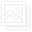
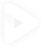
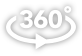
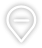

In [105]:
from bs4 import BeautifulSoup
import requests
url = 'https://m.place.naver.com/restaurant/1227120427/review/visitor?zoomLevel=12.000'
response = requests.get(url)
if response.status_code == 200:
    response.encoding = 'utf-8'  # 인코딩 설정
    datas = response.text
datas


<!DOCTYPE html>

<html lang="ko">
<head>
<title>네이버 플레이스</title>
<meta charset="utf-8"/>
<meta content="ie=edge" httpequiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no, shrink-to-fit=no" id="_viewport" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-72.png" rel="icon" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-96.png" rel="icon" sizes="96x96" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-144.png" rel="icon" sizes="144x144" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-192.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://g-place.pstatic.net/assets/shared/images/favicon-120.png" rel="apple-touch-icon"/>
<link href="https://g-place.pstatic.net/assets/shared/images/
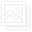
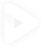
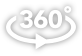
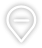

In [106]:
soup = BeautifulSoup(datas, 'html.parser')
soup

In [126]:
a = soup.select('.zPfVt')
import re
text = re.sub(r'\s+', ' ', a[0].text)
text += " "+re.sub(r'\s+', ' ', a[1].text)
text += " "+re.sub(r'\s+', ' ', a[2].text)
text

'통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡볶이~ 어른은 치맥~~ 친절하기까지.. 좋아요~ 누룽지통닭 닭냄새가 나네요 치즈듬뿍~ 맛있어요. 오돌뼈도 궁금해서 맛보고. 맛있게 먹었어요'

In [127]:
review_text_list = [] # 임시 선언

a = soup.select('.zPfVt')

review_text_list.append(re.sub(r'\s+', ' ', a[0].text))
review_text_list.append(re.sub(r'\s+', ' ', a[1].text))
review_text_list.append(re.sub(r'\s+', ' ', a[2].text))
review_text_list

['통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡볶이~ 어른은 치맥~~ 친절하기까지.. 좋아요~',
 ' 누룽지통닭 닭냄새가 나네요',
 ' 치즈듬뿍~ 맛있어요. 오돌뼈도 궁금해서 맛보고. 맛있게 먹었어요']

In [132]:
df.nunique()

name                     627
cate_1                     9
cate_2                    35
cate_3                    23
dong                       2
lon                      424
lat                      424
cate_mix                  64
naver_keyword            634
naver_map_url            619
naver_store_type         107
naver_star_point          90
naver_star_point_qty     300
naver_blog_review_txt    429
naver_blog_review_qty    129
dtype: int64

In [133]:
df

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix,naver_keyword,naver_map_url,naver_store_type,naver_star_point,naver_star_point_qty,naver_blog_review_txt,naver_blog_review_qty
808,프랑세즈,비알코올,카페,커피 전문점,흑석동,37.507927,126.964257,비알코올 카페커피 전문점,흑석동%20프랑세즈,https://m.place.naver.com/restaurant/32799888,베이커리,4.6,"1,737","[광고아님! 지극히 개인적 빵순이의 도움되실 관점] 맛 4/5, 청결 4/5, 가격...",243
1553,배달삼겹직구삼동작,한식,돼지고기 구이/찜,한식 육류 요리 전문점,상도1동,37.499926,126.951045,한식돼지고기 구이 찜한식 육류 요리 전문점,상도1동%20배달삼겹직구삼동작,https://m.place.naver.com/restaurant/1124696525,돼지고기구이,4.41,149,"맛있어요 리뷰이벤트파채 새콤하니 좋았어요 담에시키면 삼겹살로만 시킬듯🥰,언제나 친절...",27
1745,학교종이땡땡땡,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507594,126.959160,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20학교종이땡땡땡,https://m.place.naver.com/restaurant/1565352333,종합분식,4.38,91,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32
1822,부산어묵,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507188,126.963260,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20부산어묵,https://m.place.naver.com/restaurant/34013979,분식,null,91,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32
2144,김빠빠누룽지통닭,주점,요리 주점,기타 주점업,상도1동,37.504582,126.950753,주점요리 주점기타 주점업,상도1동%20김빠빠누룽지통닭,https://m.place.naver.com/restaurant/1227120427,"치킨,닭강정",4.49,94,"통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡...",51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459159,술광장호프치킨,주점,생맥주 전문,생맥주 전문점,흑석동,37.508298,126.961424,주점생맥주 전문생맥주 전문점,흑석동%20술광장호프치킨,https://m.place.naver.com/restaurant/101053017,"맥주,호프",4.11,34,"편리,굿굿,ㆍ",6
459296,등촌샤브칼국수&청기와뼈다귀해장국,한식,국수/칼국수,한식 일반 음식점업,흑석동,37.507258,126.959968,한식국수 칼국수한식 일반 음식점업,흑석동%20등촌샤브칼국수&청기와뼈다귀해장국,https://m.place.naver.com/restaurant/1066616060,해장국,4.2,149,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57
460520,상도쭈꾸미,한식,해산물 구이/찜,한식 일반 음식점업,상도1동,37.505883,126.950147,한식해산물 구이 찜한식 일반 음식점업,상도1동%20상도쭈꾸미,https://m.place.naver.com/restaurant/1598840959,주꾸미요리,null,149,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57
460835,스시투고상도점,일식,일식 회/초밥,일식 음식점업,상도1동,37.500139,126.950623,일식일식 회 초밥일식 음식점업,상도1동%20스시투고상도점,https://m.place.naver.com/restaurant/1008894345,"초밥,롤",null,149,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57


In [141]:
df.loc[df['naver_map_url'].isin(df["naver_map_url"].nunique()>2)]

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix,naver_keyword,naver_map_url,naver_store_type,naver_star_point,naver_star_point_qty,naver_blog_review_txt,naver_blog_review_qty
808,프랑세즈,비알코올,카페,커피 전문점,흑석동,37.507927,126.964257,비알코올 카페커피 전문점,흑석동%20프랑세즈,https://m.place.naver.com/restaurant/32799888,베이커리,4.6,"1,737","[광고아님! 지극히 개인적 빵순이의 도움되실 관점] 맛 4/5, 청결 4/5, 가격...",243
1553,배달삼겹직구삼동작,한식,돼지고기 구이/찜,한식 육류 요리 전문점,상도1동,37.499926,126.951045,한식돼지고기 구이 찜한식 육류 요리 전문점,상도1동%20배달삼겹직구삼동작,https://m.place.naver.com/restaurant/1124696525,돼지고기구이,4.41,149,"맛있어요 리뷰이벤트파채 새콤하니 좋았어요 담에시키면 삼겹살로만 시킬듯🥰,언제나 친절...",27
1745,학교종이땡땡땡,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507594,126.959160,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20학교종이땡땡땡,https://m.place.naver.com/restaurant/1565352333,종합분식,4.38,91,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32
1822,부산어묵,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507188,126.963260,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20부산어묵,https://m.place.naver.com/restaurant/34013979,분식,null,91,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32
2144,김빠빠누룽지통닭,주점,요리 주점,기타 주점업,상도1동,37.504582,126.950753,주점요리 주점기타 주점업,상도1동%20김빠빠누룽지통닭,https://m.place.naver.com/restaurant/1227120427,"치킨,닭강정",4.49,94,"통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡...",51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459159,술광장호프치킨,주점,생맥주 전문,생맥주 전문점,흑석동,37.508298,126.961424,주점생맥주 전문생맥주 전문점,흑석동%20술광장호프치킨,https://m.place.naver.com/restaurant/101053017,"맥주,호프",4.11,34,"편리,굿굿,ㆍ",6
459296,등촌샤브칼국수&청기와뼈다귀해장국,한식,국수/칼국수,한식 일반 음식점업,흑석동,37.507258,126.959968,한식국수 칼국수한식 일반 음식점업,흑석동%20등촌샤브칼국수&청기와뼈다귀해장국,https://m.place.naver.com/restaurant/1066616060,해장국,4.2,149,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57
460520,상도쭈꾸미,한식,해산물 구이/찜,한식 일반 음식점업,상도1동,37.505883,126.950147,한식해산물 구이 찜한식 일반 음식점업,상도1동%20상도쭈꾸미,https://m.place.naver.com/restaurant/1598840959,주꾸미요리,null,149,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57
460835,스시투고상도점,일식,일식 회/초밥,일식 음식점업,상도1동,37.500139,126.950623,일식일식 회 초밥일식 음식점업,상도1동%20스시투고상도점,https://m.place.naver.com/restaurant/1008894345,"초밥,롤",null,149,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57


In [153]:
len(df.loc[df['naver_blog_review_txt'].isin((df['naver_blog_review_txt'].value_counts()>1).index)].sort_values('naver_blog_review_txt'))

640

In [10]:
# 리뷰 텍스트 데이터 간의 텍스트 피쳐 벡터라이징
count_vect_review = CountVectorizer(min_df=2, ngram_range=(1,2))
place_review = count_vect_review.fit_transform(dfX['naver_blog_review_txt']) 

# 리뷰 텍스트 간의 코사인 유사도 따지기
place_simi_review = cosine_similarity(place_review, place_review)
place_simi_review_sorted_ind = place_simi_review.argsort()[:, ::-1]

In [182]:
len(place_simi_cate), len(place_simi_review)

(640, 640)

In [15]:
place_simi_co = (
                 + place_simi_cate * 0.3 # 공식 1. 카테고리 유사도
                 + place_simi_review * 1 # 공식 2. 리뷰 텍스트 유사도
                 + np.array(np.repeat([dfX['naver_blog_review_qty'].values], len(dfX['naver_blog_review_qty']) , axis=0)) * 0.001  # 공식 3. 블로그 리뷰가 얼마나 많이 올라왔는지
                 + np.array(np.repeat([dfX['naver_star_point'].values], len(dfX['naver_star_point']) , axis=0)) * 0.005            # 공식 4. 블로그 별점이 얼마나 높은지
                 + np.array(np.repeat([dfX['naver_star_point_qty'].values], len(dfX['naver_star_point_qty']) , axis=0)) * 0.001    # 공식 5. 블로그 별점 평가가 얼마나 많이 됐는지
                 )



# 아래 place_simi_co_sorted_ind 는 그냥 바로 사용하면 됩니다.
place_simi_co_sorted_ind = place_simi_co.argsort()[:, ::-1] 


# 최종 구현 함수
def find_simi_place(dfX, sorted_ind, place_name, top_n):
    
    place_title = dfX[dfX['name'] == place_name]
    place_index = place_title.index.values
    similar_indexes = sorted_ind[place_index, :(top_n)]
    similar_indexes = similar_indexes.reshape(-1)
    return dfX.iloc[similar_indexes]

# 상도국수를 포함해 5개 업체를 뽑아봅시다.

find_simi_place(dfX, place_simi_co_sorted_ind, '잔칫날', 5)

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix,naver_keyword,naver_map_url,naver_store_type,naver_star_point,naver_star_point_qty,naver_blog_review_txt,naver_blog_review_qty
224,카페루반,비알코올,카페,커피 전문점,흑석동,37.505110,126.960597,비알코올 카페커피 전문점,흑석동%20카페루반,https://m.place.naver.com/restaurant/1010845920,"카페,디저트",4.46,2506,"모둠회(2-3인) 55,000 상차림 인당 4,000 매운탕(소) 12,000 모둠...",1135
223,형제상회,한식,백반/한정식,한식 일반 음식점업,상도1동,37.502311,126.948670,한식백반 한정식한식 일반 음식점업,상도1동%20형제상회,https://m.place.naver.com/restaurant/32812007,생선회,4.46,2506,"모둠회(2-3인) 55,000 상차림 인당 4,000 매운탕(소) 12,000 모둠...",1135
225,요거프레소,비알코올,카페,기타 비알코올 음료점업,흑석동,37.507083,126.959529,비알코올 카페기타 비알코올 음료점업,흑석동%20요거프레소,https://m.place.naver.com/restaurant/1015973090,카페,4.46,2506,"모둠회(2-3인) 55,000 상차림 인당 4,000 매운탕(소) 12,000 모둠...",1135
497,맥도날드숭실대점,기타 간이,버거,"피자, 햄버거, 샌드위치 및 유사 음식점업",상도1동,37.495103,126.956880,"기타 간이버거피자, 햄버거, 샌드위치 및 유사 음식점업",상도1동%20맥도날드숭실대점,https://m.place.naver.com/restaurant/36123726,햄버거,4.45,3413,매장 키오스크 사용이 어려운점도 직원분이 친절이 알려주셔서 편하게 주문했어요. 음식...,86
20,매머드커피,비알코올,카페,커피 전문점,흑석동,37.507741,126.960572,비알코올 카페커피 전문점,흑석동%20매머드커피,https://m.place.naver.com/restaurant/1566784937,카페,4.40,3102,"헤이즐넛커피 맛있어요!! 여기서 먹어보고 다른 곳에서 헤이즐넛 커피먹었다가., 그건...",9


In [249]:
df = df.reset_index(drop=True)

In [253]:
df

,name,cate_1,cate_2,cate_3,dong,lon,lat,cate_mix,naver_keyword,naver_map_url,naver_store_type,naver_star_point,naver_star_point_qty,naver_blog_review_txt,naver_blog_review_qty
0,프랑세즈,비알코올,카페,커피 전문점,흑석동,37.507927,126.964257,비알코올 카페커피 전문점,흑석동%20프랑세즈,https://m.place.naver.com/restaurant/32799888,베이커리,4.60,1737.0,"[광고아님! 지극히 개인적 빵순이의 도움되실 관점] 맛 4/5, 청결 4/5, 가격...",243.0
1,배달삼겹직구삼동작,한식,돼지고기 구이/찜,한식 육류 요리 전문점,상도1동,37.499926,126.951045,한식돼지고기 구이 찜한식 육류 요리 전문점,상도1동%20배달삼겹직구삼동작,https://m.place.naver.com/restaurant/1124696525,돼지고기구이,4.41,149.0,"맛있어요 리뷰이벤트파채 새콤하니 좋았어요 담에시키면 삼겹살로만 시킬듯🥰,언제나 친절...",27.0
2,학교종이땡땡땡,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507594,126.959160,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20학교종이땡땡땡,https://m.place.naver.com/restaurant/1565352333,종합분식,4.38,91.0,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32.0
3,부산어묵,기타 간이,김밥/만두/분식,김밥 및 기타 간이 음식점업,흑석동,37.507188,126.963260,기타 간이김밥 만두 분식김밥 및 기타 간이 음식점업,흑석동%20부산어묵,https://m.place.naver.com/restaurant/34013979,분식,4.38,91.0,"쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아...",32.0
4,김빠빠누룽지통닭,주점,요리 주점,기타 주점업,상도1동,37.504582,126.950753,주점요리 주점기타 주점업,상도1동%20김빠빠누룽지통닭,https://m.place.naver.com/restaurant/1227120427,"치킨,닭강정",4.49,94.0,"통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡...",51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,술광장호프치킨,주점,생맥주 전문,생맥주 전문점,흑석동,37.508298,126.961424,주점생맥주 전문생맥주 전문점,흑석동%20술광장호프치킨,https://m.place.naver.com/restaurant/101053017,"맥주,호프",4.11,34.0,"편리,굿굿,ㆍ",6.0
636,등촌샤브칼국수&청기와뼈다귀해장국,한식,국수/칼국수,한식 일반 음식점업,흑석동,37.507258,126.959968,한식국수 칼국수한식 일반 음식점업,흑석동%20등촌샤브칼국수&청기와뼈다귀해장국,https://m.place.naver.com/restaurant/1066616060,해장국,4.20,149.0,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57.0
637,상도쭈꾸미,한식,해산물 구이/찜,한식 일반 음식점업,상도1동,37.505883,126.950147,한식해산물 구이 찜한식 일반 음식점업,상도1동%20상도쭈꾸미,https://m.place.naver.com/restaurant/1598840959,주꾸미요리,4.20,149.0,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57.0
638,스시투고상도점,일식,일식 회/초밥,일식 음식점업,상도1동,37.500139,126.950623,일식일식 회 초밥일식 음식점업,상도1동%20스시투고상도점,https://m.place.naver.com/restaurant/1008894345,"초밥,롤",4.20,149.0,"친절한 직원, 깔끔하고 넓은매장 적당히 칼칼한 맵기에 푸짐한 양이 끝내주는 뼈찜과 ...",57.0


In [166]:
df2 = df.copy()
df2 =df.fillna(method='pad')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 808 to 463753
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   640 non-null    object 
 1   cate_1                 640 non-null    object 
 2   cate_2                 640 non-null    object 
 3   cate_3                 640 non-null    object 
 4   dong                   640 non-null    object 
 5   lon                    640 non-null    float64
 6   lat                    640 non-null    float64
 7   cate_mix               640 non-null    object 
 8   naver_keyword          640 non-null    object 
 9   naver_map_url          640 non-null    object 
 10  naver_store_type       640 non-null    object 
 11  naver_star_point       640 non-null    object 
 12  naver_star_point_qty   640 non-null    object 
 13  naver_blog_review_txt  640 non-null    object 
 14  naver_blog_review_qty  640 non-null    object 
dtypes: flo

In [187]:
df['naver_blog_review_qty']= df['naver_blog_review_qty'].replace('\,', '', regex=True).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 808 to 463753
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   640 non-null    object 
 1   cate_1                 640 non-null    object 
 2   cate_2                 640 non-null    object 
 3   cate_3                 640 non-null    object 
 4   dong                   640 non-null    object 
 5   lon                    640 non-null    float64
 6   lat                    640 non-null    float64
 7   cate_mix               640 non-null    object 
 8   naver_keyword          640 non-null    object 
 9   naver_map_url          640 non-null    object 
 10  naver_store_type       640 non-null    object 
 11  naver_star_point       640 non-null    object 
 12  naver_star_point_qty   640 non-null    object 
 13  naver_blog_review_txt  640 non-null    object 
 14  naver_blog_review_qty  640 non-null    float64
dtypes: flo

C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\1382731069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['naver_blog_review_qty']= df['naver_blog_review_qty'].replace('\,', '', regex=True).astype('float64')


In [189]:
df['naver_star_point_qty']= df['naver_star_point_qty'].replace('\,', '', regex=True).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 808 to 463753
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   640 non-null    object 
 1   cate_1                 640 non-null    object 
 2   cate_2                 640 non-null    object 
 3   cate_3                 640 non-null    object 
 4   dong                   640 non-null    object 
 5   lon                    640 non-null    float64
 6   lat                    640 non-null    float64
 7   cate_mix               640 non-null    object 
 8   naver_keyword          640 non-null    object 
 9   naver_map_url          640 non-null    object 
 10  naver_store_type       640 non-null    object 
 11  naver_star_point       640 non-null    object 
 12  naver_star_point_qty   640 non-null    float64
 13  naver_blog_review_txt  640 non-null    object 
 14  naver_blog_review_qty  640 non-null    float64
dtypes: flo

C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\707061363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['naver_star_point_qty']= df['naver_star_point_qty'].replace('\,', '', regex=True).astype('float64')


In [192]:
df['naver_star_point']= df['naver_star_point'].astype('float64')
df.info()

ValueError: could not convert string to float: 'null'

In [160]:
place_simi_review

array([[1.        , 0.09845082, 0.0115818 , ..., 0.        , 0.        ,
        0.        ],
       [0.09845082, 1.        , 0.03035884, ..., 0.        , 0.        ,
        0.        ],
       [0.0115818 , 0.03035884, 1.        , ..., 0.01499906, 0.01499906,
        0.01499906],
       ...,
       [0.        , 0.        , 0.01499906, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.01499906, ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.01499906, ..., 1.        , 1.        ,
        1.        ]])

In [167]:
place_review

<640x10212 sparse matrix of type '<class 'numpy.int64'>'
	with 35498 stored elements in Compressed Sparse Row format>

In [179]:
df['naver_blog_review_txt'].unique()

array(['[광고아님! 지극히 개인적 빵순이의 도움되실 관점] 맛 4/5, 청결 4/5, 가격(가성비)4/5 인테리어나 분위기로만 승부하는 곳 보단 올바른 혹은 좋은 재료로 맛을 얼마나 합리적인 가격과 청결함으로 만드느냐가 개인적인 평가의 관점이므로 도움되길! (개인적인 감정은 최대한 배제하려고하기에 친절도는 마지막에 덧붙일게요) 바로 전 단호박 크림치즈 빵과 비교해 보시면 더 좋을 듯 이곳은 파넷트에 비해 빵이 더 많았음에도 빵이 고소하고 맛있어서 전체적으로 부드럽고 맛있었어요 이 이외에도 특히 깜빠뉴가 가격도 참 좋고 좋은 재료를 쓴다는게 느껴지는 집 ,프랑세즈빵은 많이 먹어도 속이 편해요. 빵종류도 케이크도 모두 맛있지만 샌드위치 꼭 드셔보세요. 진짜 진짜 맛있어요. ^^,이전에 샌드위치 너무 맛있게 먹어서 근처 왔다가 들렀어요 2층에서 먹고 갈 수도 있고 생각보다 자리 많고 넓어요 마늘빵 크랜베리 샌드위치 둘 다 너무너무 맛있었어요 직원분도 엄청 친절하세요👍🏻',
       '맛있어요 리뷰이벤트파채 새콤하니 좋았어요 담에시키면 삼겹살로만 시킬듯🥰,언제나 친절하시구 일처리가 너무 센스있어요! 음식은 언제나 맛있어요,양도 많고 진짜 맛있어요. 포장해갔는데 사장님께서 상추랑 쌈무 콜라 서비스로 주셨네요 포장 많이이용하려구요 잘먹었습니다 ㅎㅎ',
       '쫄순 맛나용 중대 맛집👍🏻,쫄순 7,500원 쫄면사리는 괜찮은데 순두부가 너무 잘아서 두부식감이 잘 느껴지지않아 아쉽,김치치즈밥 7,500원',
       '통닭이 기름 쪽 빠져서 담백해요 밑에 깔린 누룽지는 왤케 맛나? 아이들은 돈까스,떡볶이~ 어른은 치맥~~ 친절하기까지.. 좋아요~,누룽지통닭 닭냄새가 나네요,치즈듬뿍~ 맛있어요. 오돌뼈도 궁금해서 맛보고. 맛있게 먹었어요',
       '즉떡에 진심인 울 가족~ 소스가 자극적이지 않고 자연스런 단맛 매운맛 나서 궁물도 맛있는 준호네즉떡. ^^ 특히 볶음밥이 고소하니 너무 맛있어요. 세트가 없어서 아쉽지만 기본떡볶이3인에 사리추가 야끼만두 날

In [222]:
df3 = df.copy()
df['naver_star_point'] = df['naver_star_point'].replace("null", None)
df['naver_star_point']

C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\1011943694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['naver_star_point'] = df['naver_star_point'].replace("null", None)


808        4.6
1553      4.41
1745      4.38
1822      None
2144      4.49
          ... 
459159    4.11
459296     4.2
460520    None
460835    None
463753    None
Name: naver_star_point, Length: 640, dtype: object

In [210]:
mask = df['naver_star_point'] == 'null'
df.loc[mask, 'naver_star_point'] = df.loc[mask, 'naver_star_point'].shift(-1)

In [227]:
# mask = df['naver_star_point'].isna()
# df.loc[mask, 'naver_star_point'] = df.loc[mask, 'naver_star_point'].shift(-1)

# df['naver_star_point'] = df['naver_star_point'].fillna(method='pad')
df['naver_star_point'] = df['naver_star_point'].astype('float64')

C:\Users\tjoeun_jr\AppData\Local\Temp\ipykernel_13408\1956594385.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['naver_star_point'] = df['naver_star_point'].astype('float64')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer  # 피체 벡터화
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
dfX = pd.read_csv('./222ss.csv')
dfX.head()

In [ ]:
count_vect_category = CountVectorizer(min_df=0, ngram_range=(1,2))
place_category = count_vect_category.fit_transform(dfX['cate_mix']) 
place_simi_cate = cosine_similarity(place_category, place_category) 
place_simi_cate_sorted_ind = place_simi_cate.argsort()[:, ::-1]
# 리뷰 텍스트 데이터 간의 텍스트 피쳐 벡터라이징
count_vect_review = CountVectorizer(min_df=2, ngram_range=(1,2))
place_review = count_vect_review.fit_transform(dfX['naver_blog_review_txt']) 

# 리뷰 텍스트 간의 코사인 유사도 따지기
place_simi_review = cosine_similarity(place_review, place_review)
place_simi_review_sorted_ind = place_simi_review.argsort()[:, ::-1]

In [ ]:
place_simi_co = (
                 + place_simi_cate * 0.3 # 공식 1. 카테고리 유사도
                 + place_simi_review * 1 # 공식 2. 리뷰 텍스트 유사도
                 + np.array(np.repeat([dfX['naver_blog_review_qty'].values], len(dfX['naver_blog_review_qty']) , axis=0)) * 0.001  # 공식 3. 블로그 리뷰가 얼마나 많이 올라왔는지
                 + np.array(np.repeat([dfX['naver_star_point'].values], len(dfX['naver_star_point']) , axis=0)) * 0.005            # 공식 4. 블로그 별점이 얼마나 높은지
                 + np.array(np.repeat([dfX['naver_star_point_qty'].values], len(dfX['naver_star_point_qty']) , axis=0)) * 0.001    # 공식 5. 블로그 별점 평가가 얼마나 많이 됐는지
                 )



# 아래 place_simi_co_sorted_ind 는 그냥 바로 사용하면 됩니다.
place_simi_co_sorted_ind = place_simi_co.argsort()[:, ::-1] 


# 최종 구현 함수
def find_simi_place(dfX, sorted_ind, place_name, top_n):
    
    place_title = dfX[dfX['name'] == place_name]
    place_index = place_title.index.values
    similar_indexes = sorted_ind[place_index, :(top_n)]
    similar_indexes = similar_indexes.reshape(-1)
    return dfX.iloc[similar_indexes]

# 상도국수를 포함해 5개 업체를 뽑아봅시다.

find_simi_place(dfX, place_simi_co_sorted_ind, '잔칫날', 5)